In [7]:
#Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
df=pd.read_csv("/Users/meenu/entri/CarPrice_Assignment.csv")
print(df.head())
print(df.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [58]:
#Preprocessing
df1=df.copy()
df1['CarCompany']=df1['CarName'].apply(lambda x: x.split(' ')[0].lower())
df1['CarCompany']=df1['CarCompany'].replace({
    'maxda':'mazda','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})
df1['car_ID']=df1.drop(['car_ID'],axis=1,inplace=True)
df1['CarName']=df1.drop(['CarName'],axis=1,inplace=True)
categorical_cols=df1.select_dtypes(include=['object']).columns
df1=pd.get_dummies(df1,columns=categorical_cols,drop_first=True)
X=df1.drop('price',axis=1)
y=df1['price']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)
print(df1)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  ...  CarCompany_nissan  \
0           130       3.47    2.68         

In [62]:
#2.Model implementation
# Models
models={
    "Linear Regression":LinearRegression(),
    "Decision Tree Regressor":DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor":RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor":GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor":SVR()
}
results={}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    results[name]={
        "r2_score":r2_score(y_test,y_pred),
        "mse":mean_squared_error(y_test,y_pred),
        "mae":mean_absolute_error(y_test,y_pred)
    }

In [64]:
#3.Model Evaluation
df2=pd.DataFrame(results).T
print(df2)

                             r2_score           mse          mae
Linear Regression            0.910162  7.092188e+06  1760.870731
Decision Tree Regressor      0.906907  7.349134e+06  1782.589439
Random Forest Regressor      0.958267  3.294575e+06  1293.233793
Gradient Boosting Regressor  0.924181  5.985429e+06  1710.336389
Support Vector Regressor    -0.100615  8.688696e+07  5701.535525


In [ ]:
#Best Performing Model is found to be Random Forest Regressor
#Explanation:
#Highest R² Score(0.9583):This means it explains about 95.8% of the variance in car prices,which is excellent.
#Lowest Mean Squared Error(MSE):
#The average of the squared differences between predicted and actual values is lowest for Random Forest,indicating a better precision.
#Lowest Mean Absolute Error(MAE):
#It has the smallest average error in actual dollars,showing it's closest to true values on average.

           Feature  Importance
6       enginesize    0.544159
5       curbweight    0.298449
13      highwaympg    0.044743
10      horsepower    0.033483
3         carwidth    0.013090
2        carlength    0.007767
44  CarCompany_bmw    0.007114
1        wheelbase    0.006991
12         citympg    0.006420
11         peakrpm    0.006174


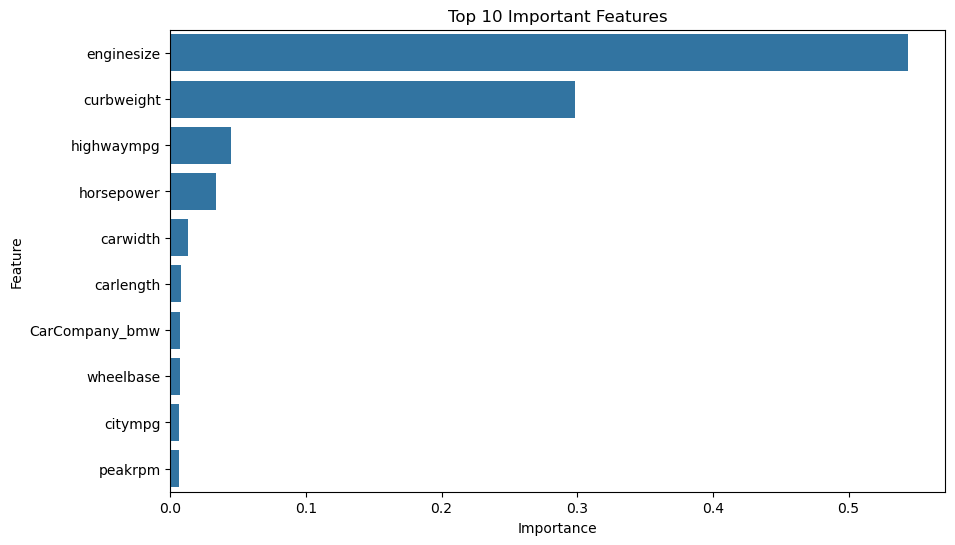

In [66]:
#4.Feature Importance Analysis
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
importances=rf_model.feature_importances_
feature_names=X.columns
feat_importance_df=pd.DataFrame({'Feature': feature_names,'Importance': importances})
feat_importance_df=feat_importance_df.sort_values(by='Importance', ascending=False)
print(feat_importance_df.head(10))
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feat_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

In [ ]:
#The significant variables affecting car prices:
#enginesize
#curbweight
#horsepower
#carwidth
#citympg
#highwaympg
#CarCompany(some specific companies)
#These features directly impact the value and performance of a car,thus heavily influencing price.

In [70]:
#5.Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[100, 200, 300],
    'max_depth':[None, 10, 20],
    'min_samples_split':[2, 5, 10]
}
grid_search=GridSearchCV(RandomForestRegressor(random_state=42),param_grid,cv=3,n_jobs=-1,verbose=2,scoring='r2')
grid_search.fit(X_train,y_train)
print("Best Parameters:",grid_search.best_params_)
best_rf=grid_search.best_estimator_
y_pred_tuned=best_rf.predict(X_test)
print("Tuned R2:",r2_score(y_test,y_pred_tuned))
print("Tuned MSE:",mean_squared_error(y_test,y_pred_tuned))
print("Tuned MAE:",mean_absolute_error(y_test,y_pred_tuned))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Tuned R2: 0.9448446522327723
Tuned MSE: 4354184.925760804
Tuned MAE: 1454.6845268180045
